In [201]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [307]:
class Activity: #activity
    #constructor    
    def __init__(self, name='',x=0.0, y=0.0,s=0.0,t=0.0):
        
        #name
        self.name = name
        #position
        self.x_coord = x #x coordinate
        self.y_coord = y #y coordinate
        
        #score
        self.score = s
        self.duration = t
        
    def distance(self,b):
        return np.sqrt( np.square(self.x_coord-b.x_coord) + np.square(self.y_coord-b.y_coord))
        #return ( np.square(self.x_coord-b.x_coord) + np.square(self.y_coord-b.y_coord))

In [241]:
class Journey:
    
    #constructor
    def __init__(self, idty=0, act=[]):
        self.idty=idty
        self.activities = act
        self.tour = range(len(act))
        self.tour_distance = 0.0
        self.score = 0.0
        self.nb_eval_dist=0
        
    def compute_score(self):
        return 0.0
    
    #remove one activity
    def remove(self, act):
        return
    
    #add one activity
    def insert(self, act):
        
        n=len(self.activities) #total number of activities currently in the journey
        
        if (n==0):
            self.tour.append(0)
            self.activities.append(act)
            return
        
        else:
        
            #activity act is inserted at the end of self.activities list
            #in the tour, we perform a least costly insertion
            
            #compute least costly insertion
            best_insertion = 1
            best_insertion_cost = np.inf
            for i in range(1,n+1):
                #compute improvement if (act) is inserted at position i
                insertion_cost = self.activities[self.tour[(i-1) %n]].distance(act) + self.activities[self.tour[i%n]].distance(act) - self.activities[self.tour[(i-1)%n]].distance(self.activities[(self.tour[i%n])]) 
                self.nb_eval_dist = self.nb_eval_dist+3
                
                if(insertion_cost < best_insertion_cost):
                    best_insertion = i
                    best_insertion_cost = insertion_cost
        
            #insert at best position
            self.tour.insert(best_insertion,n)
            #print 'Inserted', n, 'at position', best_insertion
            self.tour_distance = self.tour_distance+best_insertion_cost
            self.activities.append(act)
        
        return
    
    #replace activity1 by activity2
    def replace(self, act1, act2):
        
        self.remove(act1)
        self.insert(act2)
        n=len(self.activities)
        return
    
        #first, find act1's index and position in the tour
        act1_idx = 0
        act1_pos = 0
        for i in range(n):
            if self.activities[i]==act1:
                act1_idx = i
            if self.activities[tour[i]] ==act1:
                act1_pos = i
        
        print act1_idx, act1_pos
        
        #then, remove it from the tour
        tour_variation = - self.activities[self.tour[(act1_pos-1) %n]].distance(act1) - self.activities[self.tour[(act1_pos+1)%n]].distance(act1) + self.activities[self.tour[(act1_pos-1)%n]].distance(self.activities[(self.tour[(act1_pos+1)%n])]) 
        self.tour_distance = self.tour_distance + tour_improvement
        self.tour.remove(act1_pos)
        
        #replace act1 by act2 in the list of activities
        self.activities[act1_idx] = act2
        
        
        #compute least costly insertion
        best_insertion = 1
        best_insertion_cost = np.inf
        for i in range(1,n+1):
            #compute improvement if (act) is inserted at position i
            insertion_cost = self.activities[self.tour[(i-1) %n]].distance(act2) + self.activities[self.tour[i%n]].distance(act2) - self.activities[self.tour[(i-1)%n]].distance(self.activities[(self.tour[i%n])]) 
            self.nb_eval_dist = self.nb_eval_dist+3
              
            if(insertion_cost < best_insertion_cost):
                best_insertion = i
                best_insertion_cost = insertion_cost
        
        #insert at best position
        self.tour.insert(best_insertion,act1_idx)
        #print 'Inserted', n, 'at position', best_insertion
        self.tour_distance = self.tour_distance+best_insertion_cost
        return
        
    def lk2_tsp(self):
        n=len(self.tour)
        b=False #loop not finished yet
        while(b)
            b=False
            for i in range(n):
                for j in range(i+1,n):
                    gain = -self.activities[tour[i]%n].distance(self.activities[tour[i+1]%n])-self.activities[tour[j]%n].distance(self.activities[tour[j+1]%n])+self.activities[tour[i]%n].distance(self.activities[tour[j]%n])+self.activities[tour[i+1]%n].distance(self.activities[tour[j+1]%n])
                    if(gain>0):
                        b=True
                        #modify the tour
        return
    
    def greedy_tsp(self):
        return
        

In [310]:
def journey_optimizer_master(activity_set, tMax, nBest):
    
    #Activity_set is a list of activities
    #assume scores are weighted to reflect user's preferences for each type of activity
    
    #objective: find a subset of activities that maximise total score
    #while respecting some time constraint
    # => this is a knapsack problem
    
    #1. sort activities by decreasing ratios score / time_needed 
    activities = sorted(activity_set, key=lambda x: x.score / (x.duration+0.00001)) #protect from duration being 0.00
    
    #3. Approximately solve the knapsack problem
    #greedily add activities as long as the total duration is less than the max allowed
    t_tot=0.0
    nbActiSelected=0
    while(t_tot<=tMax):
        if (t_tot+activities[nbActiSelected].duration <= tMax):
            #add item
            nbActiSelected=nbActiSelected+1
            t_tot=t_tot+activities[nbActiSelected].duration
        else:
            break
    
    actiSelected = [activities[i] for i in range(nbActiSelected)]

    return actiSelected

0.000999927520752


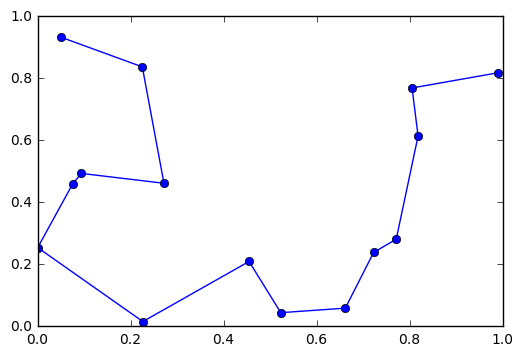

In [335]:
acti_list=[]
start=time.time() 
for i in range(100):
    s=np.random.rand()
    w=2*np.random.rand()+0.25
    a = Activity('',np.random.rand(),np.random.rand(),s,w)
    acti_list.append(a)


acti_journey = journey_optimizer_master(acti_list, 24, 1)
journey = compute_tsp_tour(acti_journey)
end=time.time()

print end-start

x=np.zeros(len(journey))
y=np.zeros(len(journey))

for i in range(len(journey)):
    x[i]=journey[i].x_coord
    y[i]=journey[i].y_coord
    
plt.plot(x,y,'o-')
plt.show()

In [329]:
def compute_tsp_tour(activities):
    
    n=len(activities)
    
    #construct distance matrix
    dist=np.zeros((n,n))
    
    for i in range(n):
        for j in range(i+1,n):
            #dist[i,j] = np.sqrt( np.square(activities[i].x_coord-activities[j].x_coord) + np.square(activities[i].y_coord-activities[j].y_coord))
            dist[i,j] = activities[i].distance(activities[j])
            dist[j,i] = dist[i,j]

   
    #start with greedy insertion
    tour_flag=[False]*n
    tour_idx=np.zeros(n)
    current_node=0
    for i in range(n):
        tour_idx[i]=current_node
        tour_flag[current_node]=True
        #find closest neighbour that is not in the tour
        closest_neighbour = current_node
        closest_distance = np.inf
        for j in range(n):
            if (tour_flag[j] or dist[current_node,j]>=closest_distance):
                #j is already in the tour
                continue
            else:
                closest_neighbour=j
                closest_distance = dist[current_node, j]
        
        current_node=closest_neighbour
    
    #compute tour
    sorted_activities=[None]*n
    for i in range(n):
        sorted_activities[i]=activities[int( tour_idx[i])]
        
    return sorted_activities